# DSLR

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
import numpy as np

## Training

In [2]:
df = pd.read_csv('datasets/dataset_train.csv')
df.describe()

,Index,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1600.00000,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,799.50000,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,462.02453,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,0.00000,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,399.75000,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,799.50000,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,1199.25000,60811.250000,524.771949,5.419183,4.904680,5.667000,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
max,1599.00000,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


In [3]:
houses = {'Ravenclaw': 0, 'Slytherin': 1, 'Gryffindor': 2, 'Hufflepuff': 3}
houses_indexes = [houses[x] for x in df['Hogwarts House']]

data = df.iloc[:, 6:]
data = data.replace(np.nan, 0)
data = (data - data.mean()) / data.std()
data

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0.545037,-1.022892,0.891954,1.018774,0.398003,1.019910,0.372554,0.534505,0.203902,-0.635960,0.800644,1.204553,-0.500330
1,1.037307,-1.147479,-1.374770,1.143088,-2.102330,-0.555187,-0.917224,0.278616,0.327585,0.437732,0.149871,-1.002983,-1.386928
2,-1.383018,-0.786411,1.278526,0.782813,0.741091,1.834775,0.921442,0.153029,0.515751,0.897149,-0.482906,1.825184,0.086673
3,-0.884632,1.278872,-1.473408,-1.277936,0.229605,-0.658193,0.305984,-1.751578,-0.566984,-1.557552,0.039667,-1.533799,1.830165
4,0.643658,0.772233,-1.729481,0.073678,-0.203490,-0.465835,0.895910,-1.440733,-0.456944,-0.474304,-0.220980,-1.481492,1.393217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.023858,0.612078,-1.095052,-0.612606,0.635116,-0.575710,1.043862,-1.847679,-0.284006,-0.760543,-0.623281,-0.799168,1.678473
1596,0.818106,0.637804,0.956559,-0.638275,-0.319385,-0.878618,-0.305962,-0.146934,0.309524,-0.004204,-0.293840,-0.347553,0.233961
1597,0.851962,0.980434,-0.836046,-0.980154,0.722945,-0.343225,1.176903,-2.019018,-0.350851,-1.281894,0.128912,-0.940656,1.807939
1598,1.897544,0.805044,0.449943,-0.805149,0.885779,-1.269542,-0.794415,0.211664,0.514853,-0.600651,-0.500157,-0.320631,-1.011640


### Training functions

Sigmoid function

In [4]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

Cost and cost derivative function

In [5]:
def cost_function(theta, data, y):
    m = len(data)
    sig = sigmoid(np.dot(theta, data.T))
    cost = -(1 / m) * (np.sum((y.T * np.log(sig)) + ((1 - y.T) * (np.log(1 - sig)))))
    derivee = (1 / m) * (np.dot((sig - y.T), data))
    sig_history = [np.dot(theta, data.T), sig]
    return derivee, cost, sig_history

Gradient Descent

In [6]:
def gradient_descent(data, y, iter=1500, learning_rate=0.1):
    m = len(data)
    history = []
    sig_history = []
    theta = np.zeros((1, data.shape[1]))
    for i in range(1500):
        derivee, cost, sig = cost_function(theta, data, y)
        theta -= learning_rate * derivee
        history.append(cost)
        sig_history.append(sig)
    return theta[0].tolist(), history, sig_history

In [7]:
thetas = []
for i, _ in enumerate(houses):
    y = []
    for house in houses_indexes:
        y.append(1 if house == i else 0)
    coeffs, history, plot_history = gradient_descent(data, np.asarray(y))
    thetas.append(coeffs)
thetas = pd.DataFrame(thetas, columns=data.columns, index=houses)
thetas.to_csv('thetas.csv')
thetas

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Ravenclaw,0.458225,-0.952830,0.663574,0.988049,0.588618,2.124071,1.072846,-0.098545,-0.036457,0.224835,0.030721,1.657811,0.243267
Slytherin,-0.284976,-1.088465,-1.093376,1.126976,-2.933908,-0.818966,-0.326389,0.124417,0.072793,0.709215,-0.014183,-1.717840,-1.632109
Gryffindor,-0.197978,0.084923,-2.727545,-0.081026,1.191072,0.009376,1.501100,-1.275664,-0.106381,-0.597886,-0.146319,-1.106076,2.619984
Hufflepuff,-0.119821,1.709932,2.032713,-1.766520,0.238465,-1.425446,-0.418484,1.352821,-0.068119,-0.465457,0.043248,-0.260027,-1.734108


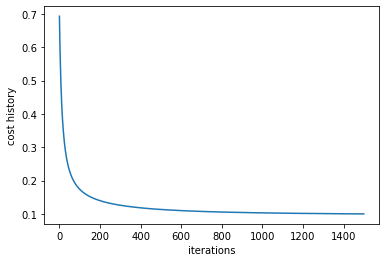

In [8]:
plt.plot(history)
plt.ylabel('cost history')
plt.xlabel('iterations')
plt.show()

## Prediction

In [9]:
df = pd.read_csv('datasets/dataset_test.csv')
thetas = pd.read_csv("thetas.csv")
data = df.iloc[:, 6:]
data = data.replace(np.nan, 0)
data = (data - data.mean()) / data.std()


thetas = thetas.drop(thetas.columns[0], axis=1)
result = {}
houses = ['Ravenclaw', 'Slytherin', 'Gryffindor', 'Hufflepuff']
for i, row in thetas.iterrows():
    sig = sigmoid(data.dot(row))
    result[houses[i]] = sig
result = pd.DataFrame(result)
print(result)
preds = []
for i, row in result.iterrows():
    preds.append(houses[row.argmax()])
preds = pd.DataFrame(preds, columns=['Hogwarts House'])
preds

     Ravenclaw  Slytherin  Gryffindor  Hufflepuff
0     0.024010   0.003801    0.204916    0.999528
1     0.999826   0.047067    0.038048    0.037669
2     0.012248   0.104744    1.000000    0.004907
3     0.118556   0.867814    0.020581    0.954683
4     0.018701   0.232763    0.148861    0.993763
..         ...        ...         ...         ...
395   0.038183   1.000000    0.008788    0.049345
396   0.014822   0.044205    0.009670    0.999837
397   0.041970   0.294141    0.035729    0.996285
398   0.999982   0.179655    0.002084    0.013556
399   0.995311   0.074109    0.007190    0.475811

[400 rows x 4 columns]


,Hogwarts House
0,Hufflepuff
1,Ravenclaw
2,Gryffindor
3,Hufflepuff
4,Hufflepuff
...,...
395,Slytherin
396,Hufflepuff
397,Hufflepuff
398,Ravenclaw


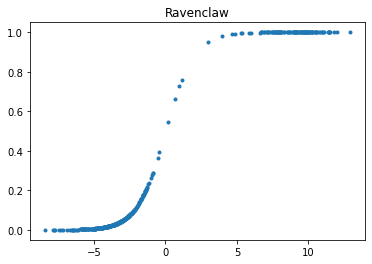

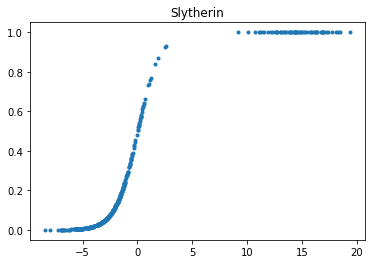

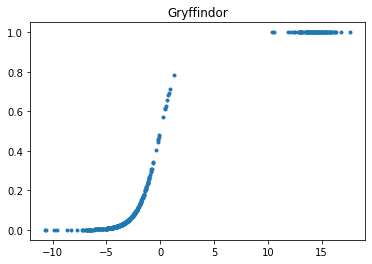

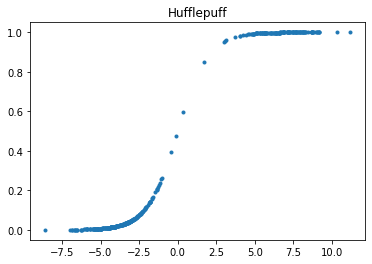

In [10]:
sorted_data = data.sort_values(data.columns.values.tolist(), ascending=False)
for i, row in thetas.iterrows():
    sig = sigmoid(sorted_data.dot(row))
    plt.plot(sorted_data.dot(row), sig, '.')
    plt.title(houses[i])
    plt.show()

## Verify performances

In [11]:
from sklearn.metrics import accuracy_score

true = pd.read_csv("datasets/dataset_truth.csv")
print(accuracy_score(true['Hogwarts House'], preds['Hogwarts House']))
print(accuracy_score(true['Hogwarts House'], preds['Hogwarts House'], normalize=False))

0.99
396
